<a href="https://colab.research.google.com/github/asangt/Portfolio-Management-of-Crypto-Assets/blob/master/Model_Best_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Extract datasets names
data_names = os.listdir('/content/drive/My Drive/best_hourly_25')
data_names.remove('transfers')
# Extract price data
price_data = []
for i in range(len(data_names)):
  column = pd.read_csv('/content/drive/My Drive/best_hourly_25/'+os.listdir('/content/drive/My Drive/best_hourly_25')[i]).close
  price_data += [column]
price_data = np.array(price_data).T

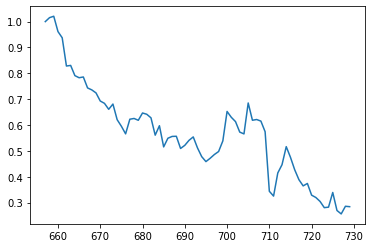

In [0]:
# Initial portfolio value is set 1
b = [1]
# Iteration by days
for i in range(658, round(price_data.shape[0]/24)-1):
  t = i*24
  # Iteration by tokens to find the best growth
  relative_price_changes = []
  for j in range(0, price_data.shape[1]):
    if price_data[:,j][t-24] !=0:
      relative_price_changes += [(price_data[:,j][t]-price_data[:,j][t-24])/price_data[:,j][t-24]]
    else:
      relative_price_changes += [-1]
  best_token_index = np.argmax(relative_price_changes)
  # Updating portfolio value
  b += [b[i-658]*(price_data[:,best_token_index][t+24]/price_data[:,best_token_index][t])]
plt.plot(range(657, round(price_data.shape[0]/24)-1), b)



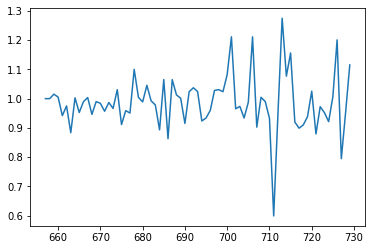

In [0]:
# Initial portfolio value is set 1
b = [1]
weight = np.array([1]+list(np.zeros(25)))
# Iteration by days
for i in range(658, round(price_data.shape[0]/24)-1):
  t = i*24
  # Iteration by tokens to find the best growth
  relative_price_changes = []
  for j in range(0, price_data.shape[1]):
    if price_data[:,j][t-24] !=0:
      relative_price_changes += [price_data[:,j][t]/price_data[:,j][t-24]]
    else:
      relative_price_changes += [-1]
  growth = np.array([1]+relative_price_changes)
  weight_new = np.zeros(len(relative_price_changes))
  weight_new[np.argmax(relative_price_changes)]=1
  weight_new = np.array([0]+ list(weight_new))
  b += [(growth@weight)]
  weight = weight_new

  
plt.plot(range(657, round(price_data.shape[0]/24)-1), b)